In [6]:
library(tree)
library(ISLR)

In [7]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [11]:
# turn Sales into binary variable
High = ifelse(Carseats$Sales < 8, "No", "Yes")
Carseats = data.frame(Carseats, High)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


In [13]:
# fit classification tree onto the Carseats dataset
tree.carseats = tree(High~.-Sales, data=Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

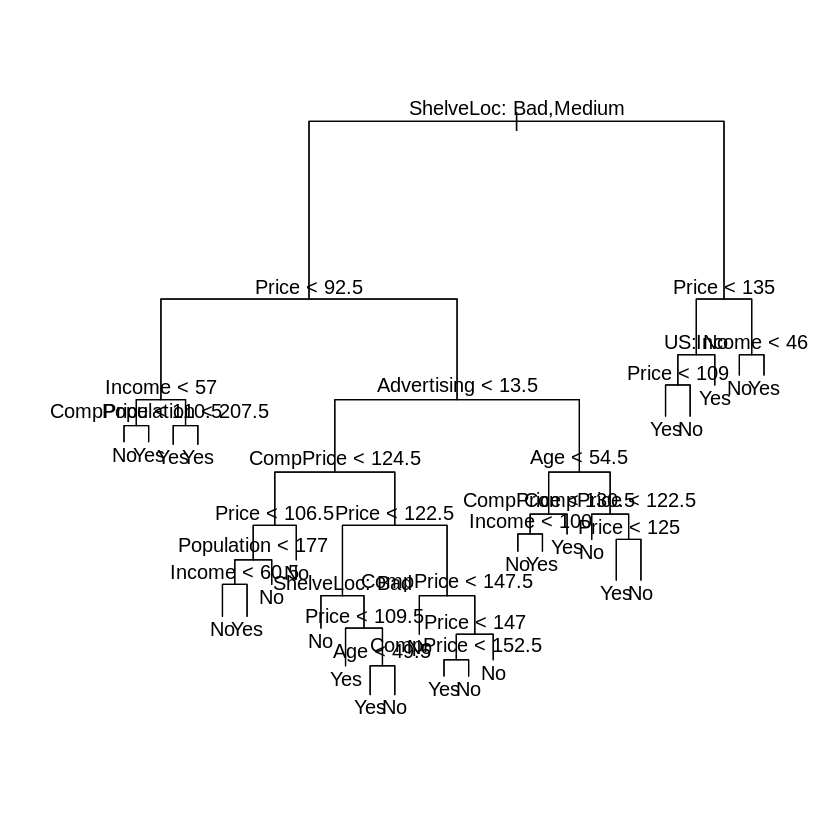

In [18]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

In [19]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541,500 No ( 0,59000 0,41000 )  
    2) ShelveLoc: Bad,Medium 315 390,600 No ( 0,68889 0,31111 )  
      4) Price < 92.5 46  56,530 Yes ( 0,30435 0,69565 )  
        8) Income < 57 10  12,220 No ( 0,70000 0,30000 )  
         16) CompPrice < 110.5 5   0,000 No ( 1,00000 0,00000 ) *
         17) CompPrice > 110.5 5   6,730 Yes ( 0,40000 0,60000 ) *
        9) Income > 57 36  35,470 Yes ( 0,19444 0,80556 )  
         18) Population < 207.5 16  21,170 Yes ( 0,37500 0,62500 ) *
         19) Population > 207.5 20   7,941 Yes ( 0,05000 0,95000 ) *
      5) Price > 92.5 269 299,800 No ( 0,75465 0,24535 )  
       10) Advertising < 13.5 224 213,200 No ( 0,81696 0,18304 )  
         20) CompPrice < 124.5 96  44,890 No ( 0,93750 0,06250 )  
           40) Price < 106.5 38  33,150 No ( 0,84211 0,15789 )  
             80) Population < 177 12  16,300 No ( 0,58333 0,41667 )  
              160) Income < 60.5 6   0

In [54]:
# using train/test split
train = sample(1:nrow(Carseats), 200)

In [55]:
Carseats.test = Carseats[-train,]
High.test = Carseats$High[-train]

In [56]:
tree.carseats = tree(High~.-Sales, data=Carseats, subset=train)
tree.pred = predict(tree.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  93  21
      Yes 34  52

In [57]:
get_accuracy <- function(y_pred, y_true) {
    return(mean(y_pred == y_true))
}

In [58]:
get_accuracy(tree.pred, High.test)

[1] 0,725

In [60]:
# prunning the tree
cv.carseats = cv.tree(tree.carseats, FUN=prune.misclass)
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [61]:
cv.carseats

$size
[1] 21 14 11  7  5  3  2  1

$dev
[1] 60 59 64 69 75 74 67 92

$k
[1] -Inf  0,0  1,0  2,5  3,0  3,5 11,0 31,0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

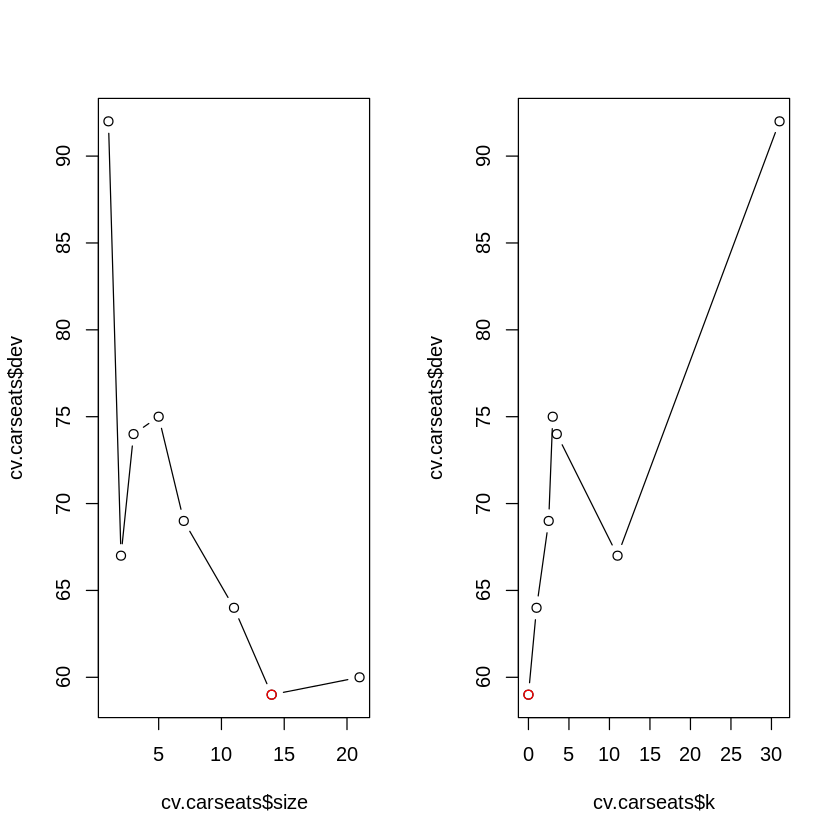

In [71]:
dev_min_idx = which.min(cv.carseats$dev)

par(mfrow=c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type="b")
points(cv.carseats$size[dev_min_idx], cv.carseats$dev[dev_min_idx], col="red")
plot(cv.carseats$k, cv.carseats$dev, type="b")
points(cv.carseats$k[dev_min_idx], cv.carseats$dev[dev_min_idx], col="red")

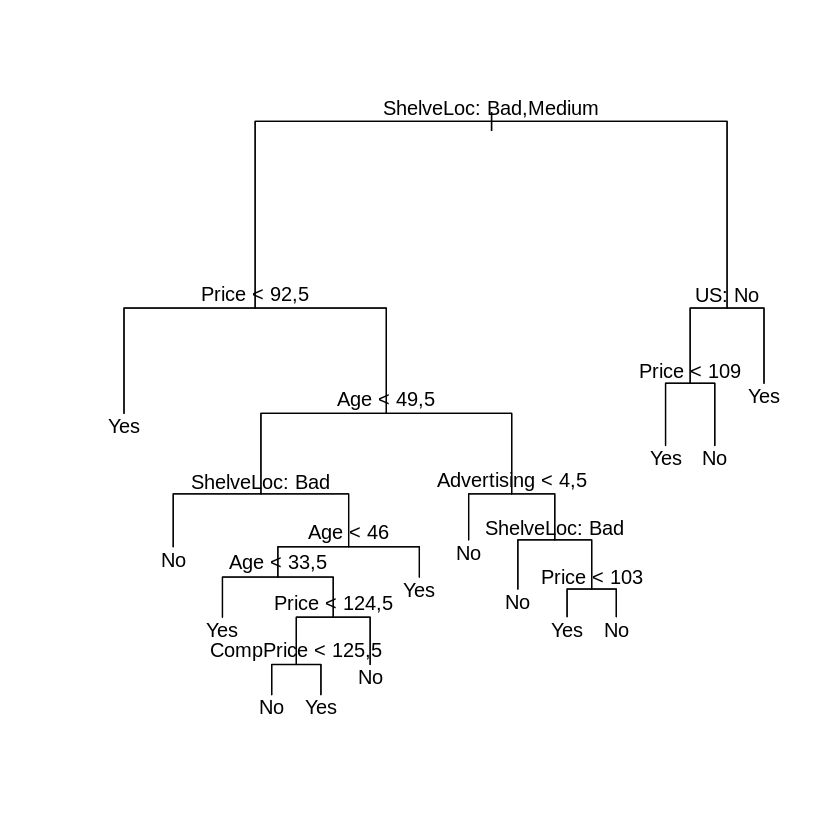

In [74]:
prune.tree = prune.misclass(tree.carseats, best=14)
plot(prune.tree)
text(prune.tree, pretty=0)

In [75]:
tree.pred = predict(prune.tree, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  93  21
      Yes 34  52

In [76]:
get_accuracy(tree.pred, High.test)

[1] 0,725

# Regression tree

In [93]:
library(MASS)

In [113]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,0900",1,296,"15,3","396,90","4,98","24,0"
"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","396,90","9,14","21,6"
"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","392,83","4,03","34,7"
"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","394,63","2,94","33,4"
"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","396,90","5,33","36,2"
"0,02985",0,"2,18",0,"0,458","6,430","58,7","6,0622",3,222,"18,7","394,12","5,21","28,7"


In [114]:
train = sample(1:nrow(Boston), nrow(Boston)/2)

In [115]:
tree.boston = tree(medv~., data=Boston, subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"      "lstat"   "dis"     "crim"    "ptratio"
Number of terminal nodes:  8 
Residual mean deviance:  15,83 = 3878 / 245 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-22,6200  -2,1760   0,1237   0,0000   2,1610  14,7200 

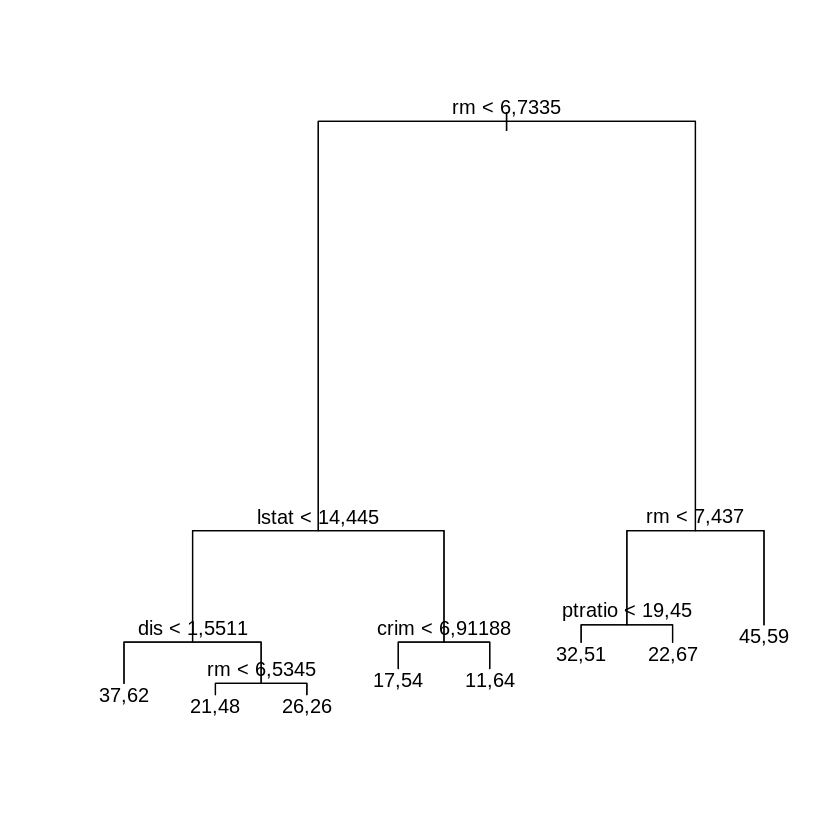

In [116]:
plot(tree.boston)
text(tree.boston, pretty=0)

In [117]:
cv.boston = cv.tree(tree.boston)

In [118]:
cv.boston

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1] 20311,28 21230,87 22155,00 24001,34 24093,40 39334,17 40973,70 23633,60

$k
[1]       -Inf   311,8998   484,1280   732,1833  1139,9867  2600,9259  3078,8913
[8] 11306,1667

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

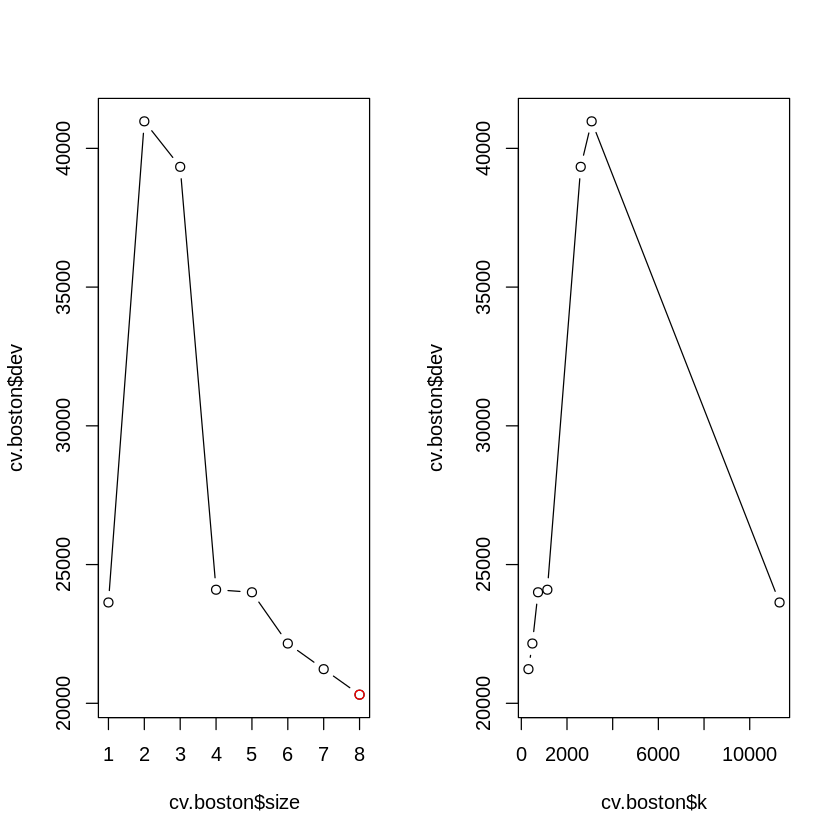

In [119]:
min_dev_idx = which.min(cv.boston$dev)

par(mfrow=c(1, 2))
plot(cv.boston$size, cv.boston$dev, type="b")
points(cv.boston$size[min_dev_idx], cv.boston$dev[min_dev_idx], col="red")
plot(cv.boston$k, cv.boston$dev, type="b")
points(cv.boston$k[min_dev_idx], cv.boston$dev[min_dev_idx], col="red")

In [122]:
prune.boston = prune.tree(tree.boston, best=8)

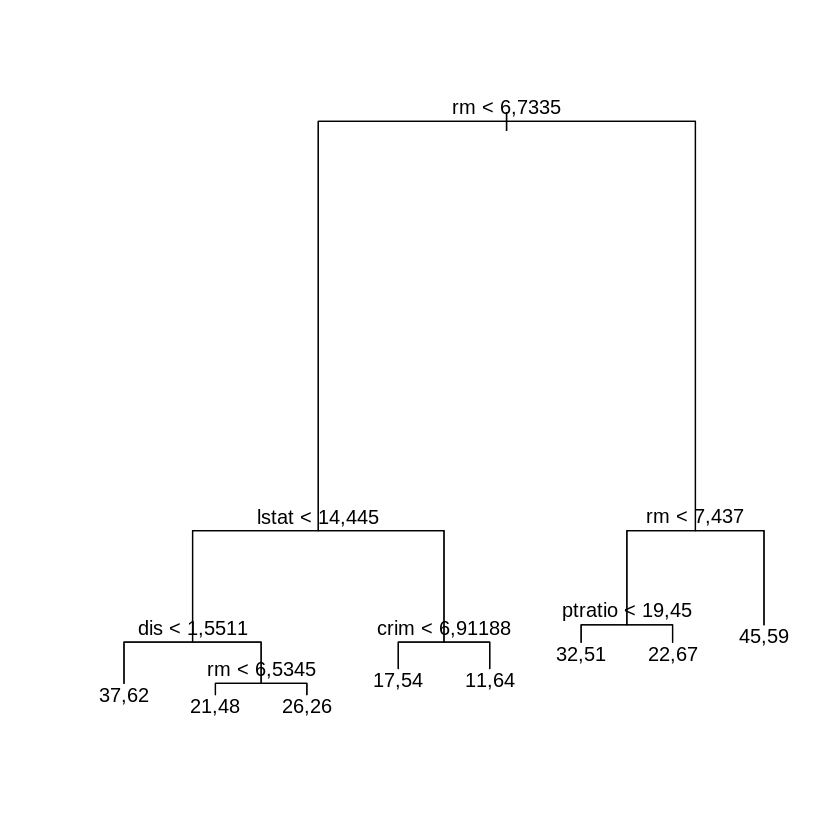

In [123]:
plot(prune.boston)
text(prune.boston, pretty=0)

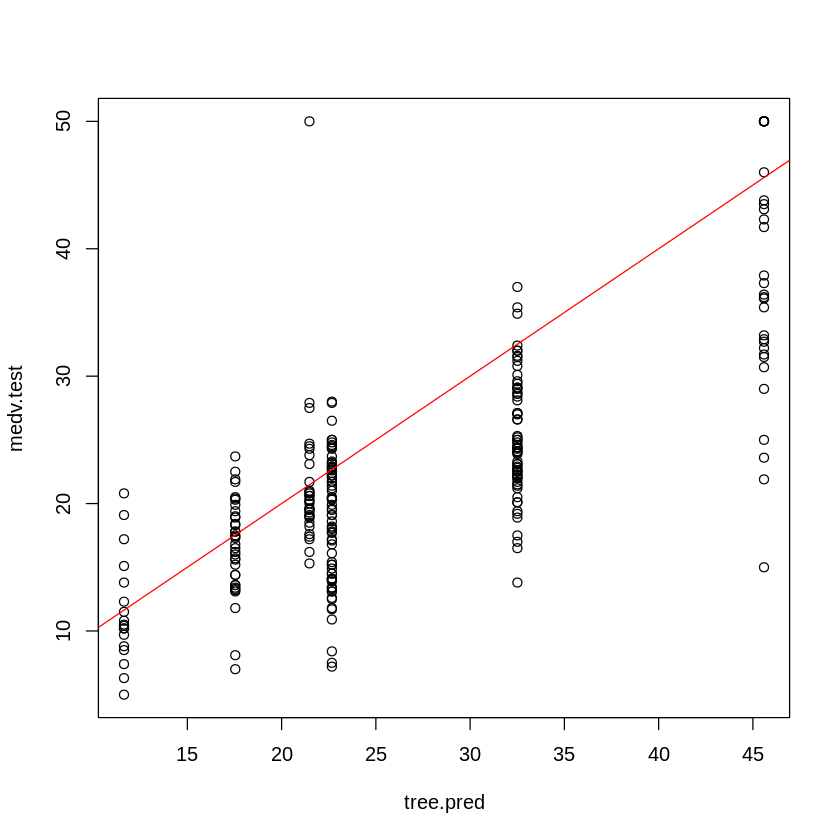

In [129]:
Boston.test = Boston[-train,]
medv.test = Boston$medv[-train]
tree.pred = predict(prune.boston, Boston.test)
plot(tree.pred, medv.test)
abline(0, 1, col="red")

In [130]:
# MSE
mean((medv.test - tree.pred) ^ 2)

[1] 57,51685

# Bagging and Random Forests

In [131]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [136]:
# bagging is the same as random forest when m = p (all predictors are used at each split)
bag.boston = randomForest(medv~., data=Boston, subset=train, mtry=13, importance=TRUE)

In [137]:
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11,53027
                    % Var explained: 87,6

In [139]:
bag.pred = predict(bag.boston, Boston.test)

In [141]:
mean((bag.pred - medv.test)^2)

[1] 12,62138

In [144]:
# setting p = 6
forest.boston = randomForest(medv~., data=Boston, subset=train, mtry=6, importance=TRUE)
forest.pred = predict(forest.boston, Boston.test)
mean((forest.pred - medv.test) ^ 2)

[1] 9,991578

In [146]:
# view the importance of each variable
importance(forest.boston)

,%IncMSE,IncNodePurity
crim,"12,032301","1465,6395"
zn,"3,187650","47,5463"
indus,"9,087489","704,5697"
chas,"3,532930","107,5130"
nox,"13,975100","1598,9073"
rm,"39,103772","8924,7599"
age,"7,053631","325,1912"
dis,"11,183485","1493,7227"
rad,"5,257378","210,0969"
tax,"7,951519","453,5391"


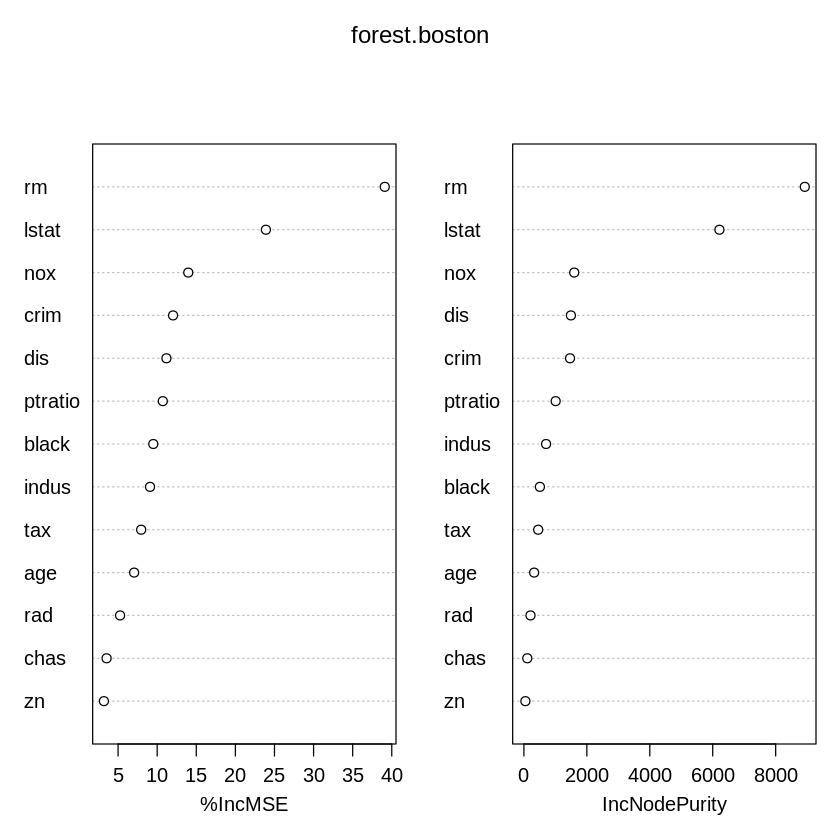

In [147]:
varImpPlot(forest.boston)

# Boosting

In [151]:
library(gbm)

Loaded gbm 2.1.5


In [153]:
boost.boston = gbm(medv~., data=Boston[train,], distribution="gaussian", n.trees=5000, 
                  interaction.depth=4)

,var,rel.inf
rm,rm,"37,44885740"
lstat,lstat,"27,15776631"
crim,crim,"8,90810267"
dis,dis,"6,67296602"
nox,nox,"3,94940933"
ptratio,ptratio,"3,72723429"
black,black,"3,53196610"
age,age,"3,39524781"
rad,rad,"1,66733338"
tax,tax,"1,59074671"


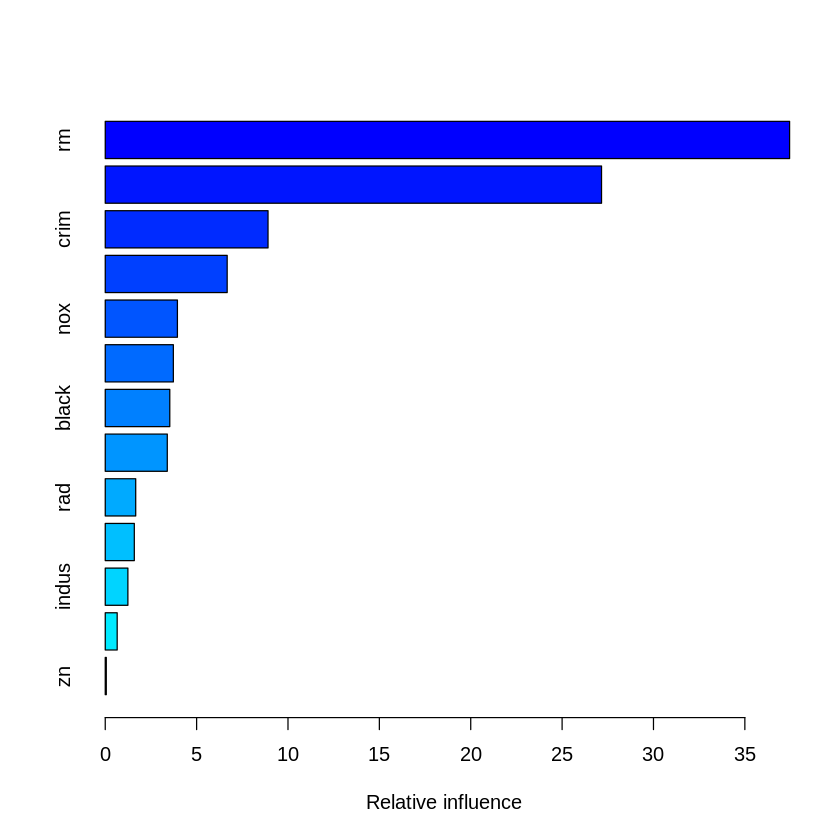

In [154]:
summary(boost.boston)

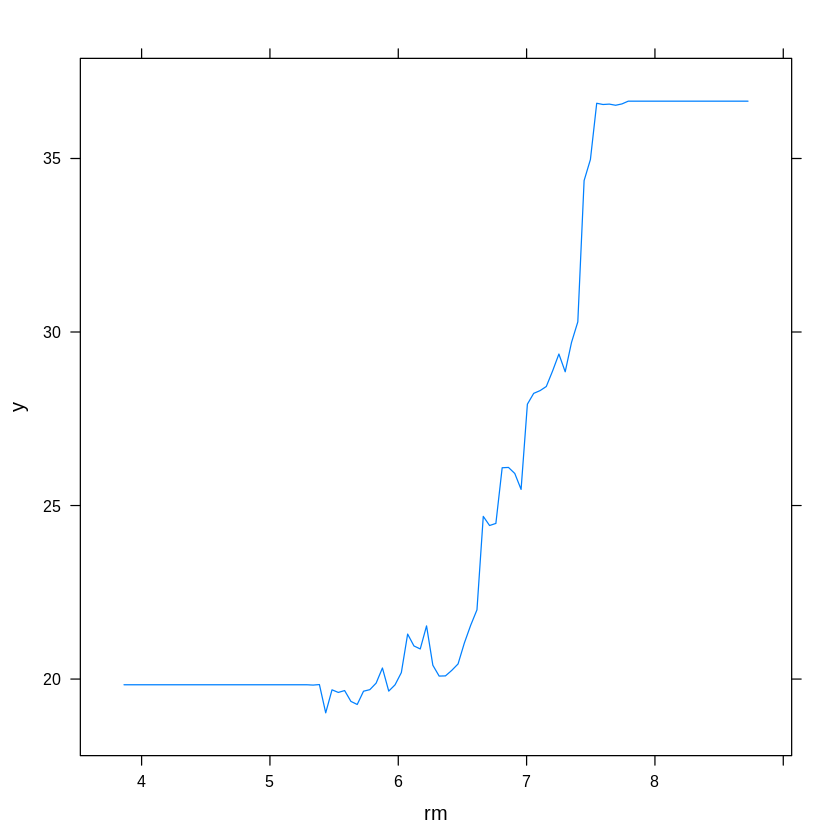

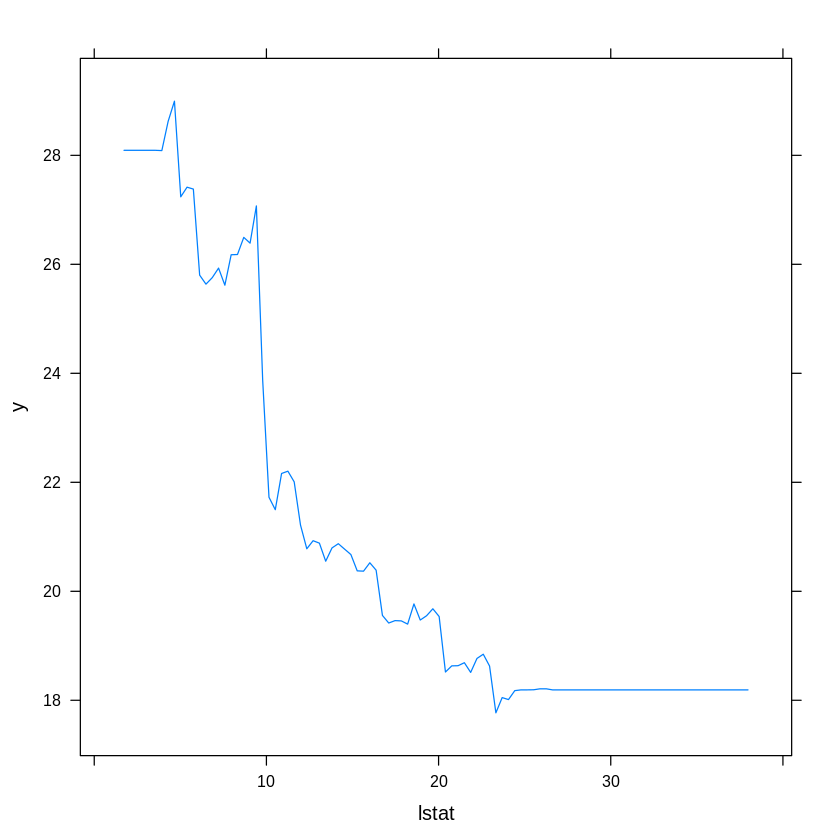

In [155]:
par(mfrow=c(1, 2))
plot(boost.boston, i="rm")
plot(boost.boston, i="lstat")

In [158]:
boost.pred = predict(boost.boston, Boston.test, n.trees=5000)
mean((boost.pred - medv.test) ^ 2)

[1] 12,69553

In [162]:
# increasing learning rate (shrinkage parameter)
boost.boston = gbm(medv~., data=Boston[train,], n.trees=5000, distribution="gaussian",
                  interaction.depth=4, shrinkage=0.2)
boost.pred = predict(boost.boston, Boston.test, n.trees=5000)
mean((boost.pred - medv.test) ^ 2)

[1] 14,75806